## Loading MNIST dataset

In [1]:
from keras.datasets import mnist

C:\Users\ANIMESH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data ()

In [3]:
print ("MNIST Training set size = %d samples" %len (X_train))
print ("MNIST Test set size = %d samples" %len (X_test))

MNIST Training set size = 60000 samples
MNIST Test set size = 10000 samples


## Visualising dataset

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
import numpy as np

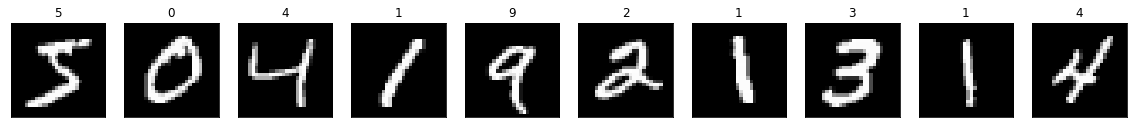

In [5]:
fig = plt.figure (figsize = (20, 20))
for i in range (10):
    ax = fig.add_subplot (1, 10, i + 1, xticks = [], yticks = [])
    ax.imshow (X_train [i], cmap = 'gray')
    ax.set_title (str (Y_train [i]))

## Viewing image in more detail

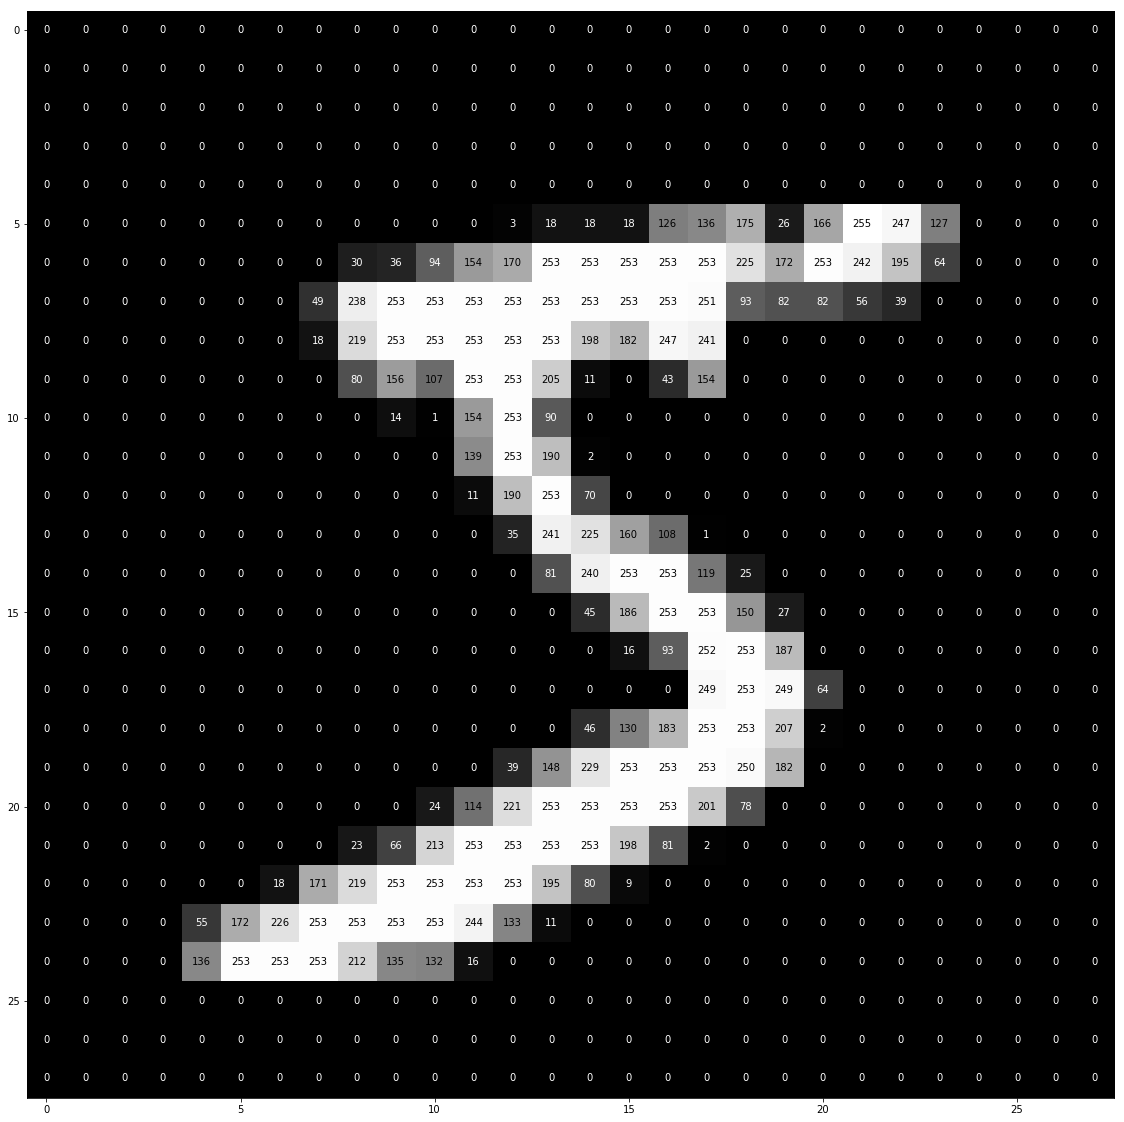

In [6]:
def visualize (img, ax):
    ax.imshow (img, cmap = 'gray')
    width, height = img.shape
    thresh = img.max () / 2.5
    for x in range (width):
        for  y in range (height):
            ax.annotate (str (round (img[x][y], 2)), xy = (y, x), horizontalalignment = 'center',  
                         verticalalignment = 'center', color = 'white' if img[x][y] < thresh else 'black')
            
fig = plt.figure (figsize = (20, 20))
ax = fig.add_subplot (111)
visualize (X_train[0], ax)

## Rescaling images

* Rescaling by dividing each image's dimensions by 255

In [7]:
X_train = X_train.astype ('float32') / 255
X_test = X_test.astype ('float32') / 255

## Encoding labels

* Categorical labels encoded using One-Hot scheme.

In [8]:
from keras.utils import np_utils

print ('Labels: ')
print (Y_train[:10])

Y_train = np_utils.to_categorical (Y_train, 10)
Y_test = np_utils.to_categorical (Y_test, 10)

print ("Encoded labels: ")
print (Y_train[:10])

Labels: 
[5 0 4 1 9 2 1 3 1 4]
Encoded labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Defining model architecture

* 6 layers NN

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

In [10]:
model = Sequential ()

model.add (Flatten (input_shape = X_train.shape[1:]))
model.add (Dense (512, activation = 'relu'))
model.add (Dropout (0.2))
model.add (Dense (512, activation = 'relu'))
model.add (Dropout (0.2))
model.add (Dense (10, activation = 'sigmoid')) # use sigmoid, softmax doesn't work on my system

model.summary ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Compiling...

In [11]:
model.compile (loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

## Calculating accuracy on Test set

*Before training.

In [12]:
score = model.evaluate (X_test, Y_test, verbose = 0)

accuracy = 100 * score[1]

print ("Accuracy on test set = %.4f%%" %accuracy)

Accuracy on test set = 5.6600%


## Training the model

In [13]:
path = r'mnist.model.best.hdf5'

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint (filepath = path, verbose = 1, save_best_only = True)

hist = model.fit (X_train, Y_train, batch_size = 128, epochs = 10,  
                  validation_split = 0.2, callbacks = [checkpointer], verbose = 1, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 238us/step - loss: 0.3095 - acc: 0.9058 - val_loss: 0.1385 - val_acc: 0.9588

Epoch 00001: val_loss improved from inf to 0.13852, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 9s 196us/step - loss: 0.1193 - acc: 0.9641 - val_loss: 0.0980 - val_acc: 0.9709

Epoch 00002: val_loss improved from 0.13852 to 0.09796, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 10s 202us/step - loss: 0.0868 - acc: 0.9735 - val_loss: 0.0956 - val_acc: 0.9737

Epoch 00003: val_loss improved from 0.09796 to 0.09562, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 10s 199us/step - loss: 0.0671 - acc: 0.9798 - val_loss: 0.0943 - val_acc: 0.9772

Epoch 00004: val_loss improved from 0.09562 to 0.09434, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48

## Loading Model w/ best classification accuracy

In [14]:
model.load_weights('mnist.model.best.hdf5')

## Calculating accuracy

*On Test set

In [15]:
score = model.evaluate (X_test, Y_test, verbose = 0)
accuracy = 100 * score[1]

print ('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 97.8400%
